In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

from sklearn.metrics import silhouette_score, davies_bouldin_score, mutual_info_score
from sklearn.cluster import KMeans

In [31]:
# Baixando os dados

blood = pd.read_csv('Cópia de bloodtransf.csv')
diabetes = pd.read_csv('Cópia de diabetes_numeric.csv')
wine = pd.read_csv('Cópia de wine.csv')


In [32]:
# Avaliando as informações dos dados

print(blood.info())
print(' ')
print(blood.describe())
print(' ')
print(blood.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   V1      748 non-null    int64
 1   V2      748 non-null    int64
 2   V3      748 non-null    int64
 3   V4      748 non-null    int64
 4   Class   748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB
None
 
               V1          V2            V3          V4       Class
count  748.000000  748.000000    748.000000  748.000000  748.000000
mean     9.506684    5.514706   1378.676471   34.282086    1.237968
std      8.095396    5.839307   1459.826781   24.376714    0.426124
min      0.000000    1.000000    250.000000    2.000000    1.000000
25%      2.750000    2.000000    500.000000   16.000000    1.000000
50%      7.000000    4.000000   1000.000000   28.000000    1.000000
75%     14.000000    7.000000   1750.000000   50.000000    1.000000
max     74.000000   50.000000  12500.000000   98.000000    2.

In [33]:
# Avaliando as informações dos dados

print(diabetes.info())
print(' ')
print(diabetes.describe())
print(' ')
print(diabetes.isna().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        43 non-null     float64
 1   deficit    43 non-null     float64
 2   c_peptide  43 non-null     float64
dtypes: float64(3)
memory usage: 1.1 KB
None
 
             age    deficit  c_peptide
count  43.000000  43.000000  43.000000
mean    9.032558  -8.148837   4.746512
std     4.022539   7.123080   0.720565
min     0.900000 -29.000000   3.000000
25%     5.500000 -12.700000   4.450000
50%    10.400000  -7.800000   4.900000
75%    11.850000  -2.000000   5.100000
max    15.600000  -0.200000   6.600000
 
age          0
deficit      0
c_peptide    0
dtype: int64


In [34]:
# Avaliando as informações dos dados

print(wine.info())
print(' ')
print(wine.describe().T)
print(' ')
print(wine.isna().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   class                           178 non-null    int64  
 1   Alcohol                         178 non-null    float64
 2   Malic_acid                      178 non-null    float64
 3   Ash                             178 non-null    float64
 4   Alcalinity_of_ash               178 non-null    float64
 5   Magnesium                       178 non-null    int64  
 6   Total_phenols                   178 non-null    float64
 7   Flavanoids                      178 non-null    float64
 8   Nonflavanoid_phenols            178 non-null    float64
 9   Proanthocyanins                 178 non-null    float64
 10  Color_intensity                 178 non-null    float64
 11  Hue                             178 non-null    float64
 12  OD280%2FOD315_of_diluted_wines  178 

In [35]:
# Avaliando o dataset Diabetes com Linear Regression

X = diabetes.iloc[:, :-1]
y = diabetes.iloc[:, -1]

modelo_lr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.37, random_state = 5762)

modelo_lr.fit(X_train, y_train)

y_pred = modelo_lr.predict(X_test)

# Calcula o coeficiente de determinação R2
r2 = r2_score(y_test, y_pred)
print("R2: {:.2f}".format(r2))

# Calcula o erro absoluto médio (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("MAE: {:.2f}".format(mae))

# Calcula o erro quadrático médio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("MSE: {:.2f}".format(mse))




R2: 0.02
MAE: 0.53
MSE: 0.44


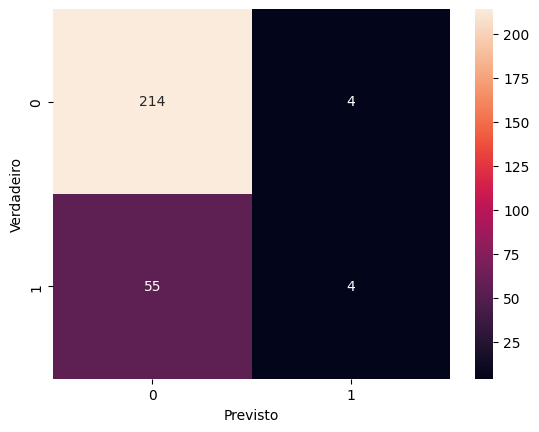

Acurácia: 78.70%
Precisão: 79.55%
Recall: 98.17%
F1: 87.89%
AUROC: 52.47%


In [36]:
# Avaliando o dataset Diabetes com Linear Regression

X = blood.iloc[:, :-1]
y = blood.iloc[:, -1]

modelo_svc = SVC(kernel='rbf')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.37, random_state = 5762)

modelo_svc.fit(X_train, y_train)

y_pred = modelo_svc.predict(X_test)


# Calcula a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plota a matriz de confusão utilizando a biblioteca Seaborn
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()



 #Calcula a acurácia
acuracia = accuracy_score(y_test, y_pred)
print("Acurácia: {:.2f}%".format(acuracia * 100))

 #Calcula a precisão
precisao = precision_score(y_test, y_pred)
print("Precisão: {:.2f}%".format(precisao * 100))

 #Calcula o recall
recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}%".format(recall * 100))

 #Calcula a medida F1
f1 = f1_score(y_test, y_pred)
print("F1: {:.2f}%".format(f1 * 100))

 #Calcula a área sob a curva ROC (AUROC)
auroc = roc_auc_score(y_test, y_pred)
print("AUROC: {:.2f}%".format(auroc * 100))


In [37]:
# Avaliando o dataset Diabetes com Linear Regression


X = wine.iloc[:, :-1]
y = wine.iloc[:, -1]

modelo_knn = KMeans(random_state = 5762)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.37, random_state = 5762)


range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:

    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=5762)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)

    # O valor do silhouette_score varia de -1 a 1. Um valor de +1 indica que o ponto está muito bem ajustado em seu cluster e muito distante dos pontos em outros clusters. 
    # Um valor de -1 indica que o ponto pode estar no cluster errado.
    davies_bouldin_avg = davies_bouldin_score(X, cluster_labels)
    print("Para o n_clusters =", n_clusters, "A média do silhouette_score é :",silhouette_avg, "e A média do davies_bouldin_score é:",davies_bouldin_avg )

    #O davies_bouldin_score é uma métrica que calcula a relação entre a dispersão dentro dos clusters e a dispersão entre os clusters, e quanto menor o score, melhor o desempenho do modelo.


    cluster_labels_test = clusterer.fit_predict(X_test)
    mutual_info_score_avg = mutual_info_score(y_test, cluster_labels_test)
    print("Para o n_clusters =", n_clusters, "A média do mutual_info_score é :",mutual_info_score_avg)
    # valor do mutual_info_score varia de 0 a 1, sendo que um valor mais alto indica uma melhor correspondência entre as etiquetas reais e as etiquetas previstas.



Para o n_clusters = 2 A média do silhouette_score é : 0.5027740345905246 e A média do davies_bouldin_score é: 0.7234249737352209
Para o n_clusters = 2 A média do mutual_info_score é : 0.6074642687464912
Para o n_clusters = 3 A média do silhouette_score é : 0.4204361167334279 e A média do davies_bouldin_score é: 0.769589400285806
Para o n_clusters = 3 A média do mutual_info_score é : 0.671685698547302
Para o n_clusters = 4 A média do silhouette_score é : 0.4022392238287289 e A média do davies_bouldin_score é: 0.7953648418709272
Para o n_clusters = 4 A média do mutual_info_score é : 0.9811642242879363
Para o n_clusters = 5 A média do silhouette_score é : 0.32687111677736874 e A média do davies_bouldin_score é: 0.957290449861306
Para o n_clusters = 5 A média do mutual_info_score é : 1.1522220955057354
Para o n_clusters = 6 A média do silhouette_score é : 0.2655344488123591 e A média do davies_bouldin_score é: 1.1099821489430737
Para o n_clusters = 6 A média do mutual_info_score é : 1.3737

In [38]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(cluster_labels.shape)


(112, 13)
(66, 13)
(112,)
(66,)
(178,)


# Respondendo as questões

In [42]:
# Pergunta 1
diabetes.shape
# shape retorna (linhas/exemplos/instancias, atributos/classes/variáveis)

(43, 3)

In [41]:
# Pergunta 2
blood.shape

(748, 5)

In [48]:
# Pergunta 3
print(wine['class'].nunique())
print(wine.shape)

3
(178, 14)


In [49]:
# Pergunta 4
print(diabetes.isna().sum())
print(blood.isna().sum())
print(wine.isna().sum())

age          0
deficit      0
c_peptide    0
dtype: int64
V1       0
V2       0
V3       0
V4       0
Class    0
dtype: int64
class                             0
Alcohol                           0
Malic_acid                        0
Ash                               0
Alcalinity_of_ash                 0
Magnesium                         0
Total_phenols                     0
Flavanoids                        0
Nonflavanoid_phenols              0
Proanthocyanins                   0
Color_intensity                   0
Hue                               0
OD280%2FOD315_of_diluted_wines    0
Proline                           0
dtype: int64


In [50]:
# Pergunta 5/6/7
# Avaliando o dataset Diabetes com Linear Regression

X = diabetes.iloc[:, :-1]
y = diabetes.iloc[:, -1]

modelo_lr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.37, random_state = 5762)

modelo_lr.fit(X_train, y_train)

y_pred = modelo_lr.predict(X_test)

# Calcula o coeficiente de determinação R2
r2 = r2_score(y_test, y_pred)
print("R2: {:.2f}".format(r2))

# Calcula o erro absoluto médio (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("MAE: {:.2f}".format(mae))

# Calcula o erro quadrático médio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("MSE: {:.2f}".format(mse))




R2: 0.02
MAE: 0.53
MSE: 0.44


In [51]:
# Pergunta 8/9/10/11

# Avaliando o dataset Diabetes com Linear Regression

X = blood.iloc[:, :-1]
y = blood.iloc[:, -1]

modelo_svc = SVC(kernel='rbf')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.37, random_state = 5762)

modelo_svc.fit(X_train, y_train)

y_pred = modelo_svc.predict(X_test)


 #Calcula a acurácia
acuracia = accuracy_score(y_test, y_pred)
print("Acurácia: {:.2f}%".format(acuracia * 100))

 #Calcula a precisão
precisao = precision_score(y_test, y_pred)
print("Precisão: {:.2f}%".format(precisao * 100))

 #Calcula o recall
recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}%".format(recall * 100))

 #Calcula a medida F1
f1 = f1_score(y_test, y_pred)
print("F1: {:.2f}%".format(f1 * 100))

 #Calcula a área sob a curva ROC (AUROC)
auroc = roc_auc_score(y_test, y_pred)
print("AUROC: {:.2f}%".format(auroc * 100))

Acurácia: 78.70%
Precisão: 79.55%
Recall: 98.17%
F1: 87.89%
AUROC: 52.47%


In [54]:
# Pergunta 12/13/14/15

# Avaliando o dataset Diabetes com Linear Regression


X = wine.iloc[:, :-1]
y = wine.iloc[:, -1]

modelo_knn = KMeans(random_state = 5762)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.37, random_state = 5762)


range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:

    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=5762)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    mutual_info_score_avg = mutual_info_score(y_test, clusterer.fit_predict(X_test))

    # O valor do silhouette_score varia de -1 a 1. Um valor de +1 indica que o ponto está muito bem ajustado em seu cluster e muito distante dos pontos em outros clusters. 
    # Um valor de -1 indica que o ponto pode estar no cluster errado.
    davies_bouldin_avg = davies_bouldin_score(X, cluster_labels)
    print("Para o n_clusters =", n_clusters, "A média do silhouette_score é :",silhouette_avg, "e A média do davies_bouldin_score é:",davies_bouldin_avg, "A média do mutual_info_score é :",mutual_info_score_avg )

    #O davies_bouldin_score é uma métrica que calcula a relação entre a dispersão dentro dos clusters e a dispersão entre os clusters, e quanto menor o score, melhor o desempenho do modelo.

    # valor do mutual_info_score varia de 0 a 1, sendo que um valor mais alto indica uma melhor correspondência entre as etiquetas reais e as etiquetas previstas.



Para o n_clusters = 2 A média do silhouette_score é : 0.5027740345905246 e A média do davies_bouldin_score é: 0.7234249737352209 A média do mutual_info_score é : 0.6074642687464912
Para o n_clusters = 3 A média do silhouette_score é : 0.4204361167334279 e A média do davies_bouldin_score é: 0.769589400285806 A média do mutual_info_score é : 0.671685698547302
Para o n_clusters = 4 A média do silhouette_score é : 0.4022392238287289 e A média do davies_bouldin_score é: 0.7953648418709272 A média do mutual_info_score é : 0.9811642242879363
Para o n_clusters = 5 A média do silhouette_score é : 0.32687111677736874 e A média do davies_bouldin_score é: 0.957290449861306 A média do mutual_info_score é : 1.1522220955057354
Para o n_clusters = 6 A média do silhouette_score é : 0.2655344488123591 e A média do davies_bouldin_score é: 1.1099821489430737 A média do mutual_info_score é : 1.373788961756275
